<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm

#### Read the dataset in the csv file from the URL


In [37]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [38]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [39]:
# ------------------------------
# Task 1: Load the Dataset
# ------------------------------
# Inspect the first few rows
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


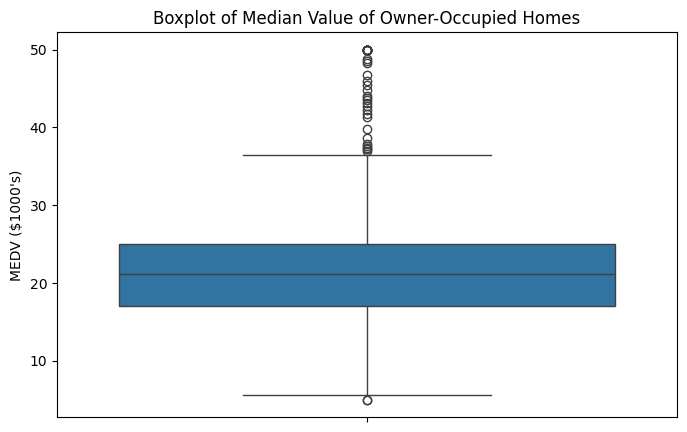

In [40]:
# ------------------------------
# Task 2: Descriptive Statistics & Visualizations
# ------------------------------

# 2.1 Boxplot of MEDV
plt.figure(figsize=(8,5))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("MEDV ($1000's)")
plt.show()

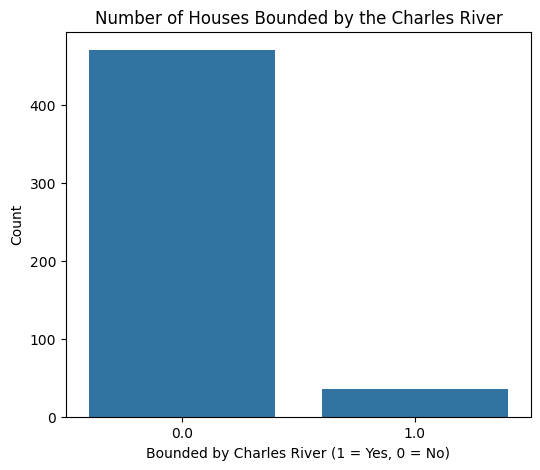

In [23]:
# 2.2 Bar plot for Charles River Variable (CHAS)
plt.figure(figsize=(6,5))
sns.countplot(x='CHAS', data=boston_df)
plt.title("Number of Houses Bounded by the Charles River")
plt.xlabel("Bounded by Charles River (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


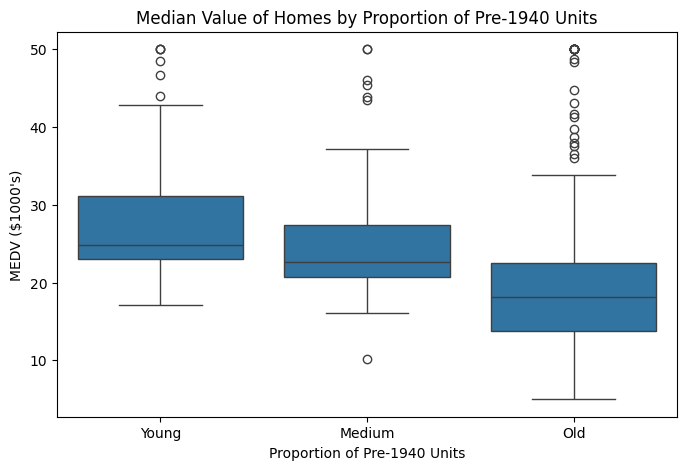

In [41]:
# 2.3 Boxplot: MEDV vs AGE groups
bins = [0, 35, 70, 100]
labels = ['Young', 'Medium', 'Old']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title("Median Value of Homes by Proportion of Pre-1940 Units")
plt.xlabel("Proportion of Pre-1940 Units")
plt.ylabel("MEDV ($1000's)")
plt.show()

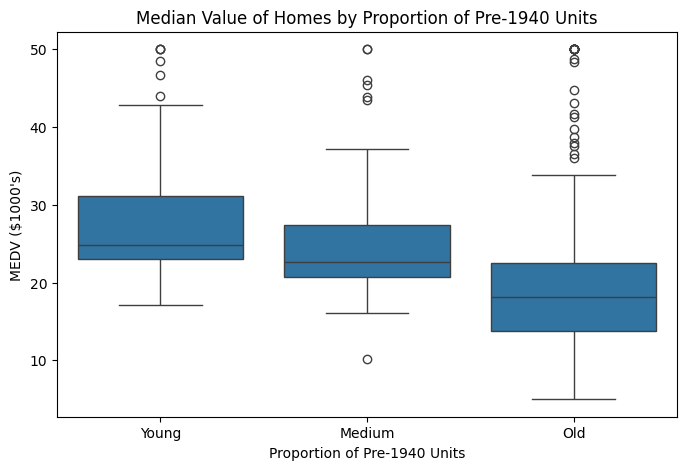

In [26]:
# 2.3 Boxplot of MEDV vs AGE groups
# Discretize AGE into three groups
bins = [0, 35, 70, 100]
labels = ['Young', 'Medium', 'Old']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title("Median Value of Homes by Proportion of Pre-1940 Units")
plt.xlabel("Proportion of Pre-1940 Units")
plt.ylabel("MEDV ($1000's)")
plt.show()


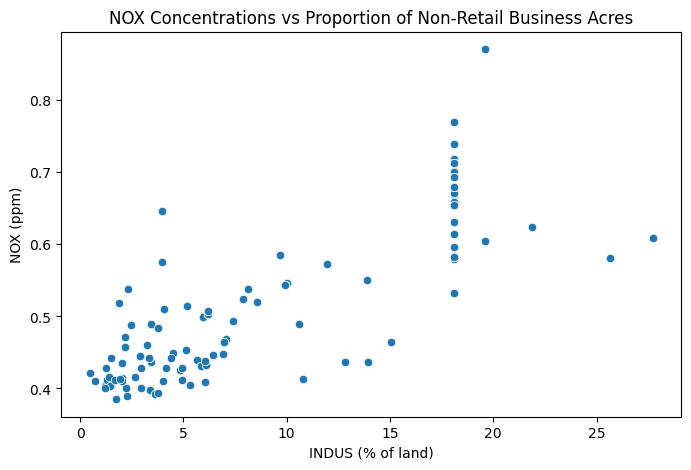

In [42]:
# 2.4 Scatter plot: NOX vs INDUS
plt.figure(figsize=(8,5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("NOX Concentrations vs Proportion of Non-Retail Business Acres")
plt.xlabel("INDUS (% of land)")
plt.ylabel("NOX (ppm)")
plt.show()

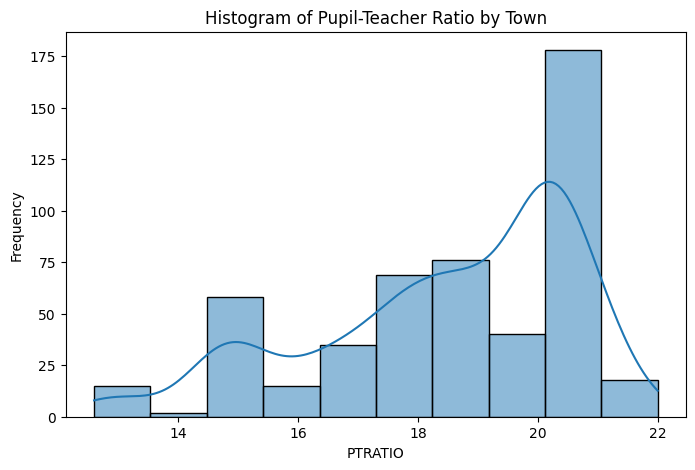

In [30]:
# 2.5 Histogram of Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8,5))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio by Town")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()


In [44]:
# ------------------------------
# Task 3: Statistical Tests
# ------------------------------

# 3.1 T-test: MEDV by Charles River (CHAS)
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(river, no_river)
print("T-test: MEDV vs CHAS")
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Conclusion: Significant difference in median values based on river proximity.")
else:
    print("Conclusion: No significant difference in median values based on river proximity.")

T-test: MEDV vs CHAS
t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05
Conclusion: Significant difference in median values based on river proximity.


In [46]:
# 3.2 ANOVA: MEDV by AGE groups
young = boston_df[boston_df['AGE_group'] == 'Young']['MEDV']
medium = boston_df[boston_df['AGE_group'] == 'Medium']['MEDV']
old = boston_df[boston_df['AGE_group'] == 'Old']['MEDV']

f_stat, p_val = f_oneway(young, medium, old)
print("\nANOVA: MEDV by AGE groups")
print("F-statistic:", f_stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Conclusion: There is a significant difference in MEDV across AGE groups.")
else:
    print("Conclusion: No significant difference in MEDV across AGE groups.")


ANOVA: MEDV by AGE groups
F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15
Conclusion: There is a significant difference in MEDV across AGE groups.


In [48]:
# 3.3 Pearson Correlation: NOX vs INDUS
corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation: NOX vs INDUS")
print("Correlation coefficient:", corr)
print("p-value:", p_val)
if p_val < 0.05:
    print("Conclusion: Significant correlation exists between NOX and INDUS.")
else:
    print("Conclusion: No significant correlation between NOX and INDUS.")


Pearson Correlation: NOX vs INDUS
Correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98
Conclusion: Significant correlation exists between NOX and INDUS.


In [50]:
# 3.4 Regression: MEDV vs DIS
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # adds intercept term
model = sm.OLS(y, X).fit()
print("\nRegression Analysis: MEDV vs Distance to Employment Centers (DIS)")
print(model.summary())


Regression Analysis: MEDV vs Distance to Employment Centers (DIS)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        19:08:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------